# <font color=blue><center><b>DATA ANALYSIS AND VISUALIZATION OF </center><br><center>SHOPPING MART SALES DATA</b></center></font>

# Problem Statement:
The data scientists at a Shopping Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to  find out the sales of each product at a particular store. Using this Shopping Mart will try to understand the properties of products and stores which play a key role in increasing sales.


**Note**: Check the data cleaning part of the notebook. 

# <font color="blue"><center>DATA ANALYSIS</center></font>

# Importing Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tick

# Reading the data

In [8]:
data = pd.read_csv('bigmartsales.csv')
data.head()  #first few rows 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [7]:
data.tail()#Last few rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.5,OUT046,1997,Small,Tier1,Supermarket Type1,765.6700,14.6


# Dimension of the data

In [ ]:
data.shape

(8523, 13)

# The data is of the type float,object and int

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

# Columns in the data set

<b>Columns Description:</b><br><br>
<b>Item_Identifier :</b> Unique product ID

<b>Item_Weight:</b>  Weight of product

<b>Item_Fat_Content :</b> Whether the product is low fat or not

<b>Item_Visibility :</b> The % of total display area of all products in a store allocated to the particular product

<b>Item_Type :</b> The category to which the product belongs

<b>Item_MRP :</b> Maximum Retail Price (list price) of the product

<b>Outlet_Identifier :</b> Unique store ID

<b>Outlet_Establishment_Year :</b> The year in which store was established

<b>Outlet_Size :</b> The size of the store in terms of ground area covered

<b>Outlet_Location_Type :</b> The type of city in which the store is located

<b>Outlet_Type :</b> Whether the outlet is just a grocery store or some sort of supermarket

<b>Item_Outlet_Sales :</b> Sales of the product in the particular store.

In [17]:
print(data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')


# The describe method 

In [18]:
data.describe() #shows basic statistical characteristics of each numerical feature (int64 and float64 types)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


# The average price of an item is 140.99 and max price is 266.9 and min price is 31.3

In [19]:
data.describe(include=['object', 'float']) 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
count,8523,7774.000000,8523,8523.000000,8523,8523.000000,8523,6113,6473,8523,8523.000000,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,3,8,4,NaN,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,Medium,Tier 2,Supermarket Type1,NaN,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,2793,2793,5577,NaN,NaN
mean,NaN,11.676740,NaN,0.066132,NaN,140.998838,NaN,NaN,NaN,NaN,2181.288914,13.414514
std,NaN,5.776851,NaN,0.051598,NaN,62.258099,NaN,NaN,NaN,NaN,1706.499616,1.701840
min,NaN,0.000000,NaN,0.000000,NaN,31.300000,NaN,NaN,NaN,NaN,33.290000,0.100000
25%,NaN,7.720000,NaN,0.026989,NaN,93.800000,NaN,NaN,NaN,NaN,834.247400,13.150000
50%,NaN,11.800000,NaN,0.053931,NaN,142.700000,NaN,NaN,NaN,NaN,1794.331000,13.900000
75%,NaN,16.500000,NaN,0.094585,NaN,185.650000,NaN,NaN,NaN,NaN,3101.296400,14.300000


# Unique method

In [20]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

# Missing Values

In [22]:
print(data.isna().sum())

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64


<b>Observations:</b><br>
There are 749 missing values in Item_Weight column<br>
There are 2410 missing values in Outlet_Size column<br>
There are 2050 missing values in Outlet_Location_Type column

In [23]:
print('Categorical Value Count for the following columns:\n')
print('Outlet_Size:')
print(data['Outlet_Size'].value_counts())
print('\nOutlet_Location_Type:')
print(data['Outlet_Location_Type'].value_counts())

Categorical Value Count for the following columns:

Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type:
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64


In [24]:
#Replace the following unintelligible categories with np.nan
data.replace({"?": np.nan, "  --": np.nan, "na": np.nan, "NAN": np.nan, "  -": np.nan}, inplace = True)
print(data.isna().sum())



Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2410
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64


<b>Updated Observations:</b><br>
There are 749 missing values in Item_Weight column<br>
There are 2410 missing values in Outlet_Size column<br>
There are 2410 missing values in Outlet_Location_Type column

# Handling missing values

In [25]:
# Filling missing values of Item_Weight
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)#filling null values with mean value

In [26]:
data['Outlet_Location_Type'].fillna(method="ffill",inplace = True)
data['Outlet_Size'].fillna(method="ffill",inplace = True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,High,Tier 3,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [27]:
replace={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
data.Item_Fat_Content.replace(replace, inplace=True)
print(data.Item_Fat_Content.value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [28]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

# Indexing by Name

In [29]:
data.loc[0:3, 'Item_Identifier':'Item_Type']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy
1,DRC01,5.92,Regular,0.019278,Soft Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables


# Indexing by Number

In [30]:
data.iloc[0:3, 0:13]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5


In [31]:
data[-1:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.5,OUT046,1997,Small,Tier1,Supermarket Type1,765.67,14.6


# Apply method

In [32]:
import numpy as np
data.apply(np.max) 

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                                 266.9
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                              Small
Outlet_Location_Type                     Tier1
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
Profit                                    24.0
dtype: object

# <font color="RED"><center> Visualization</center></font>

# <font color='green'>A.Univariate Analysis:</font>

# <font color="purple">1) Item fat content</font>

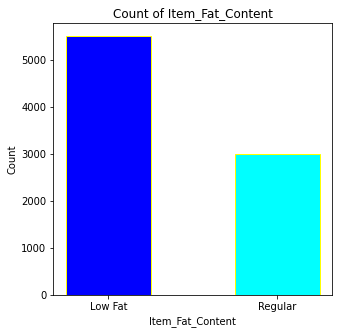

In [33]:
plt.rcParams['figure.figsize']=(5,5)
plt.bar(['Low Fat','Regular'],data.Item_Fat_Content.value_counts(),width=0.5,color=['blue', 'cyan'],edgecolor='yellow')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Count of Item_Fat_Content')
plt.show()

<b>**Observations:**</b><br>
-The Items are mostly of Low Fat.
    

# <font color="purple">2) Item Type</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


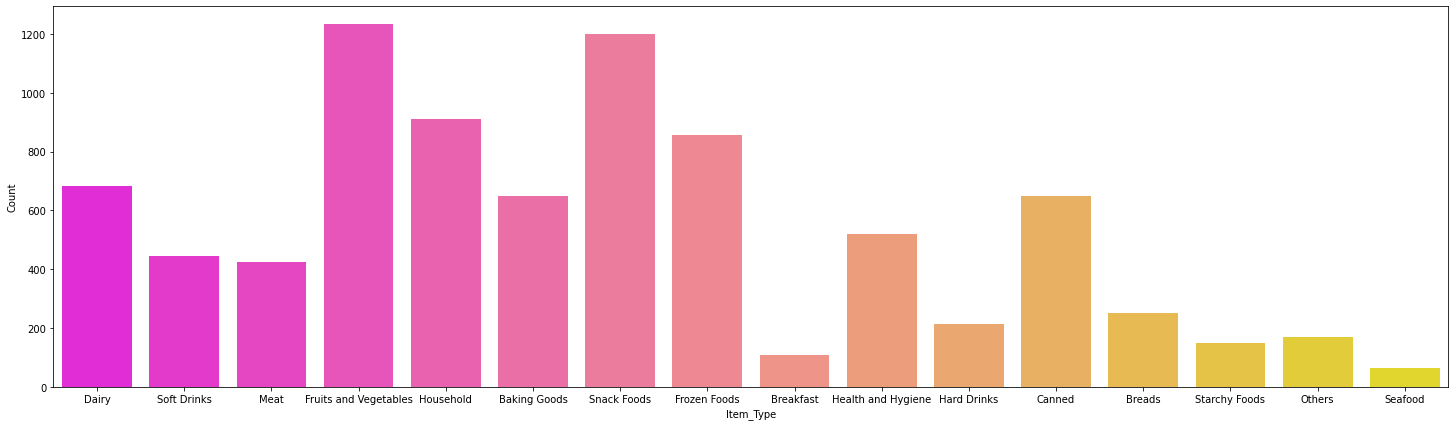

In [34]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=data,palette='spring')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.show()

<b>Observations:</b><br>
-Fruits and Vegetables are largely sold as people tend to use them on daily purpose.<br>
-Snack Foods too have good sales.

# <font color="purple">3) Outlet Size</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


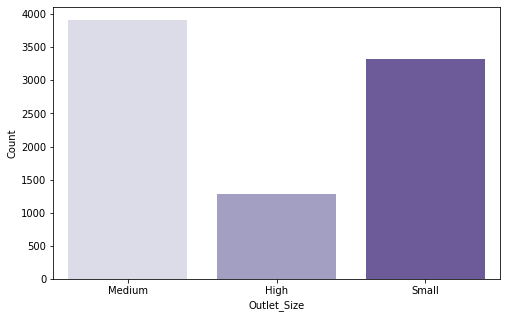

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=data,palette='Purples')
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.show()

 <b>Observations:</b><br>
-The Outlets are more of Medium Size

# <font color="purple">4) Outlet Type</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


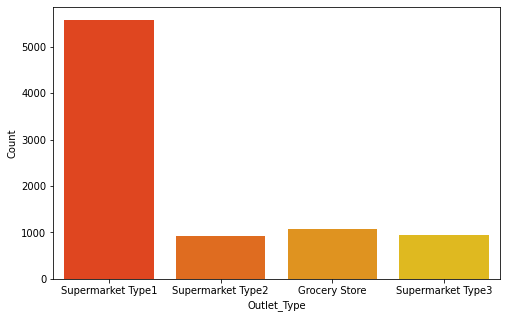

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=data,palette='autumn')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.show()

<b>Observations:</b><br>
-The Outlets are mostly of Supermarket Type1.

# <font color='green'>B.Bivariate Analysis</font>

# <font color="purple">5) Impact of Item Fat Content on Item outlet sales</font>

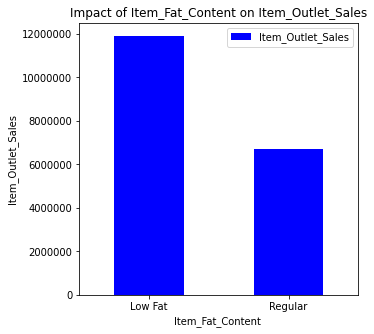

In [37]:
Outlet_Type_pivot = data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

<b>Observations:</b><br>
The Item Outles sales are higher for Low Fat compared to Regular Item types. 

# <font color="purple"> 6) Impact of Item type on Outlet Sales</font>

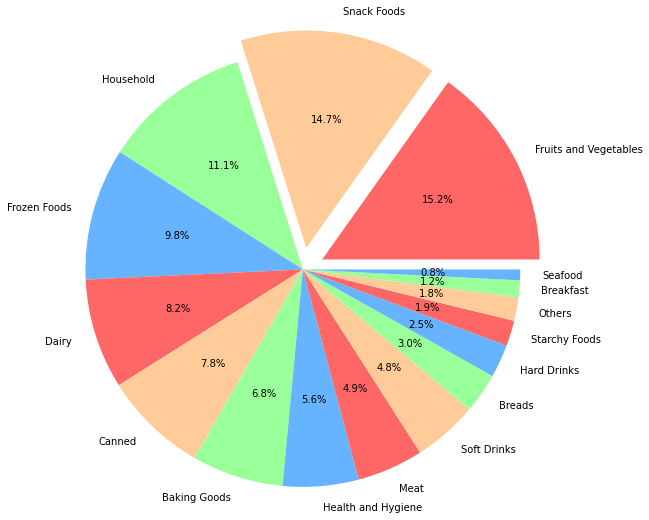

In [38]:
df3=data.groupby(by='Item_Type').sum()
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
plt.rcParams['font.size'] = 10
plt.pie(df2, autopct = '%0.1f%%', radius = 2.0, labels = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood'],
      explode = [0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0],colors=['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'])
plt.show()


<b>Observations:</b><br>
Fruits and Vegetables generated most Sales where as Seafood generated the least sales accross all stores

# <font color="purple">7) Impact of Outlets on Sales</font>

In [39]:
type1=data.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()

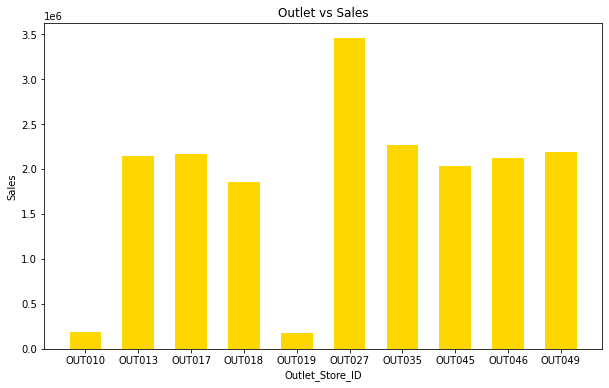

In [40]:
plt.rcParams['figure.figsize']=(10,6)
a=['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']
plt.bar(a,type1,color='gold',width=0.6)
plt.xlabel('Outlet_Store_ID')
plt.ylabel('Sales')
plt.title('Outlet vs Sales')
plt.show()

<b>Observations:</b><br>
Most Sales was generated at Outlet 'OUT027'

# <font color="purple">8) Impact of Outlet Type on Outlet Sales</font>

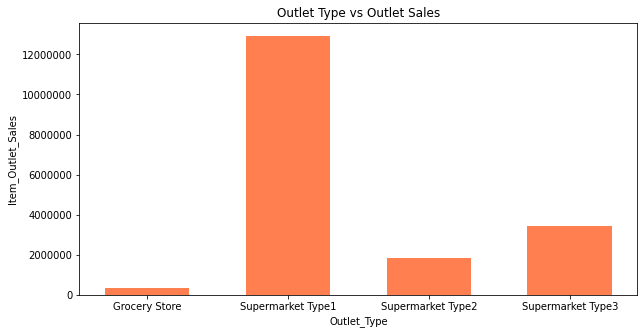

In [41]:
plt.figure(figsize=(10,5))
type2=data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.6,color='coral')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

<b>Observations:</b><br>
Supermarket Type 1 has the heighest Sales

# <font color="purple">9) Impact of Outlet Size on Outlet Sales</font>

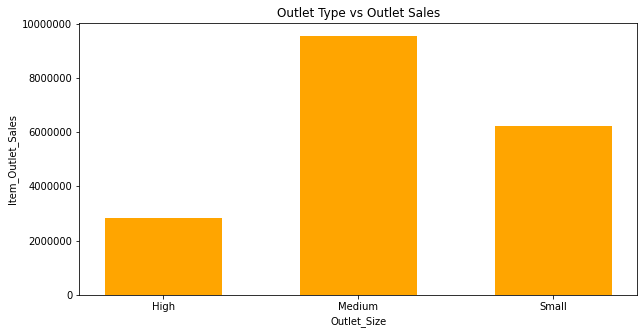

In [42]:
#sci to plain
#x and y
plt.figure(figsize=(10,5))
type3 = data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
plt.bar(size, type3, color='Orange',width=0.6)
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

<b>Observations:</b><br>
The Outlet Sales is maximum for Medium sized Outlets.<br>
High size Outlets can improve the Outlet Sales.


# <font color="purple">10) Item type vs Item MRP</font>

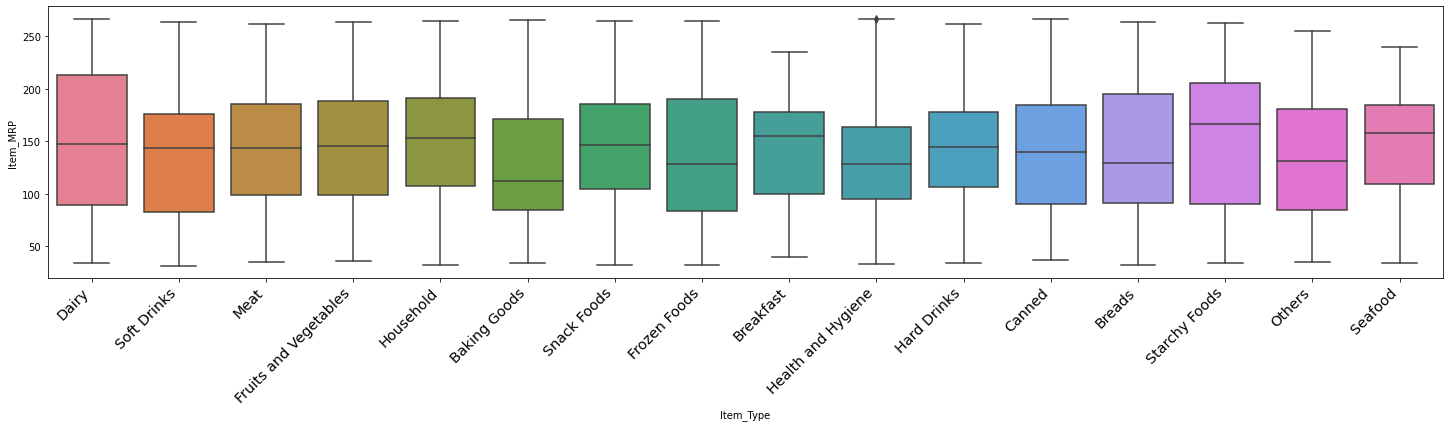

In [43]:
plt.rcParams['figure.figsize'] = 25,5
chart=sns.boxplot(x="Item_Type",y="Item_MRP",data=data,palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.show()

<b>Observations:</b><br>
Dairy and Starchy Foods have the Highest Mrps(200-250 dollars).
Starchy Foods have highest average Item MRP

# <font color="purple">11) Impact of Outlet Establishment Year on Sales</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


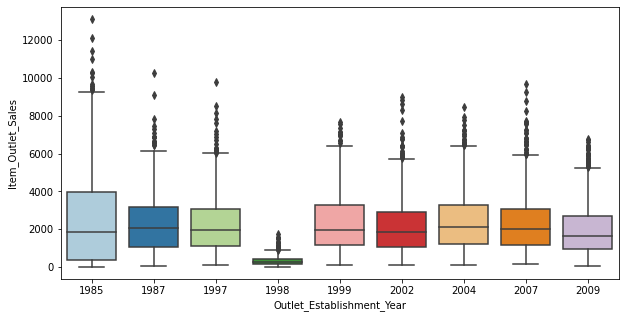

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=data,palette="Paired")
plt.show()

<b>Observations:</b><br>
Average sales are the same across stores established from 1985 to 2009(except for the 1998 established store)
The highest Item outlet sales is recorded by stores established in 1985.

# <font color="purple">12) Impact of Profit vs Item_Type</font>

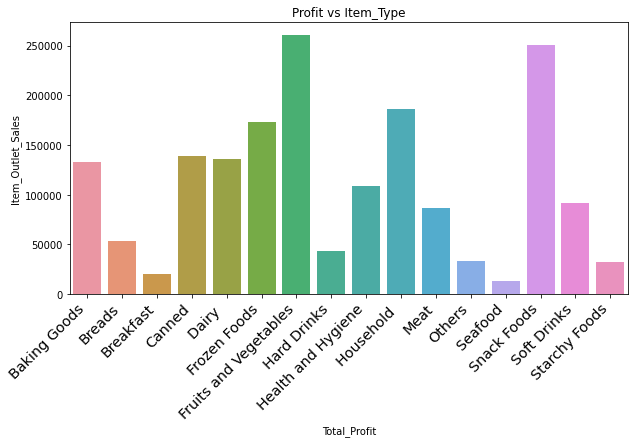

In [46]:
data["Total_Profit"] = (data['Item_Outlet_Sales']/data['Item_MRP']) * data['Profit']
type6=data.groupby(by='Item_Type')['Total_Profit'].sum()
plt.figure(figsize = (10,5))
lab = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood']
lab.sort()
chart = sns.barplot(x = lab, y = type6)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.xlabel('Total_Profit')
plt.ylabel('Item_Outlet_Sales')
plt.title('Profit vs Item_Type')
plt.show()

<b>Observations:</b><br>
'Fruits and Vegetables' have the highest Total Profit

# Key Observations:
1.The Items are mostly of Low Fat.<br>
2.Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.<br>
3.The Outlets are more of Medium Size<br>
4.The Outlets are mostly of Supermarket Type1.<br>
5.The Item Outles sales are higher for Low Fat compared to Regular Item types. <br>
6.Fruits and Vegetables generated most Sales where as Seafood generated the least sales accross all stores.<br>
7.Most Sales was generated at Outlet 'OUT027'.<br>
8.Supermarket Type 1 has the heighest Sales.<br>
9.The Outlet Sales is maximum for Medium sized Outlets.
   High size Outlets can improve the Outlet Sales.<br>
10.Dairy and Starchy Foods have the Highest Mrps(200-250 dollars).
Starchy Foods have highest average Item MRP<br>
11.Average sales are the same across stores established from 1985 to 2009(except for the 1998 established store)<br>
The highest Item outlet sales is recorded by stores established in 1985.<br>
12.'Fruits and Vegetables' have the highest Total Profit.


<font color="blue"> Thankyou
